# The Vertex Collection - Not Finished

Needs:

* Bug in xAOD backend for using `First` and a dict accessor (see below).
* Type checking: `First` is not known as a valid method on an iterator

In [1]:
import matplotlib.pyplot as plt
from config import ds

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


Fetch all the inner detector tracks and plot their $p_T$ and the radius of the first hit on the tracks.

In [2]:
vertices = (ds
            .SelectMany(lambda e: e.Vertices("PrimaryVertices"))
            .Select(lambda v: 
            {
                    "x": v.x(),
                    "y": v.y(),
                    "z": v.z(),
                    "n": v.nTrackParticles()
            })
            .AsAwkwardArray()
            .value())

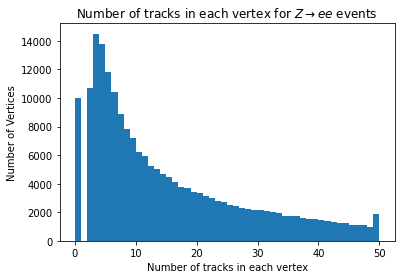

In [3]:
plt.hist(vertices.n, bins=50, range=(0, 50))
plt.xlabel('Number of tracks in each vertex')
plt.ylabel('Number of Vertices')
_ = plt.title('Number of tracks in each vertex for $Z\\rightarrow ee$ events')

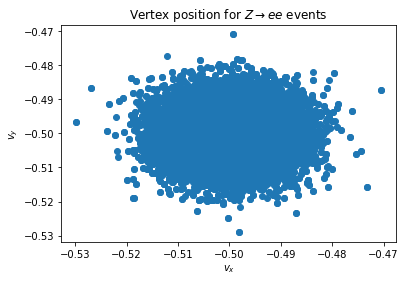

In [4]:
plt.scatter(vertices.x, vertices.y)
plt.xlabel('$v_x$')
plt.ylabel("$v_y$")
_ = plt.title('Vertex position for $Z\\rightarrow ee$ events')

Normally one wants only the primary vertex - which in ATLAS is the first vertex in the collection.

In [6]:
vertices = (ds
            .Select(lambda e: e.Vertices("PrimaryVertices").First())
            .Select(lambda v:
            {
                    "x": v.x(),
                    "y": v.y(),
                    "z": v.z(),
                    "n": v.nTrackParticles()
            })
            .AsAwkwardArray()
            .value())

Docker image and tag: atlas/analysisbase:21.2.197
Docker Output: 
  Configured GCC from: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/gcc
  Configured AnalysisBase from: /usr/AnalysisBase/21.2.197/InstallArea/x86_64-centos7-gcc8-opt
  -- The C compiler identification is GNU 8.3.0
  -- The CXX compiler identification is GNU 8.3.0
  -- Detecting C compiler ABI info
  -- Detecting C compiler ABI info - done
  -- Check for working C compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/gcc - skipped
  -- Detecting C compile features
  -- Detecting C compile features - done
  -- Detecting CXX compiler ABI info
  -- Detecting CXX compiler ABI info - done
  -- Check for working CXX compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/g++ - skipped
  -- Detecting CXX compile features
  -- Detecting CXX compile features - done
  -- Found AnalysisBase: /usr/AnalysisBase/21.2.197/InstallArea/x86_64-centos7-gcc8-opt (version: 21.2.197)
  -- Found AnalysisBaseExternals: /usr/AnalysisBaseExternals/2

DockerException: The docker command executed was `C:\Program Files\Docker\Docker\resources\bin\docker.EXE container run --rm --volume C:\Users\gordo\AppData\Local\Temp\tmpfi_efaao:/scripts:ro --volume C:\Users\gordo\AppData\Local\Temp\tmpfi_efaao:/results: --volume C:\Users\gordo\Code\atlas\data\xAODSampleFiles:/data/:ro atlas/analysisbase:21.2.197 /scripts/runner.sh`.
It returned with code 2
The content of stdout can be found above the stacktrace (it wasn't captured).
The content of stderr is '/workdir/rel/source/analysis/Root/query.cxx: In member function 'virtual StatusCode query::execute()':
/workdir/rel/source/analysis/Root/query.cxx:106:16: error: 'i_obj10' was not declared in this scope
         _y17 = i_obj10->y();
                ^~~~~~~
/workdir/rel/source/analysis/Root/query.cxx:106:16: note: suggested alternative: 'i_obj8'
         _y17 = i_obj10->y();
                ^~~~~~~
                i_obj8
/workdir/rel/source/analysis/Root/query.cxx:108:16: error: 'i_obj12' was not declared in this scope
         _z18 = i_obj12->z();
                ^~~~~~~
/workdir/rel/source/analysis/Root/query.cxx:108:16: note: suggested alternative: 'i_obj8'
         _z18 = i_obj12->z();
                ^~~~~~~
                i_obj8
/workdir/rel/source/analysis/Root/query.cxx:110:16: error: 'i_obj14' was not declared in this scope
         _n19 = i_obj14->nTrackParticles();
                ^~~~~~~
/workdir/rel/source/analysis/Root/query.cxx:110:16: note: suggested alternative: 'i_obj8'
         _n19 = i_obj14->nTrackParticles();
                ^~~~~~~
                i_obj8
/workdir/rel/source/analysis/Root/query.cxx:118:17: warning: unused variable 'i_obj10' [-Wunused-variable]
     for (auto &&i_obj10 : *vertices7)
                 ^~~~~~~
/workdir/rel/source/analysis/Root/query.cxx:132:17: warning: unused variable 'i_obj12' [-Wunused-variable]
     for (auto &&i_obj12 : *vertices7)
                 ^~~~~~~
/workdir/rel/source/analysis/Root/query.cxx:146:17: warning: unused variable 'i_obj14' [-Wunused-variable]
     for (auto &&i_obj14 : *vertices7)
                 ^~~~~~~
make[2]: *** [analysis/CMakeFiles/analysisLib.dir/Root/query.cxx.o] Error 1
make[1]: *** [analysis/CMakeFiles/analysisLib.dir/all] Error 2
make: *** [all] Error 2
'


## The Datamodel

The data model when this documentation was last built was:

In [ ]:
from func_adl_servicex_xaodr21.xAOD.trackparticle_v1 import TrackParticle_v1
help(TrackParticle_v1)

## Further Information

* The [`xAOD::TrackParticle_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTracking/xAODTracking/versions/TrackParticle_v1.h) with all the inline documentation.
* The [Tracking CP group R21 recommendation pages](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/TrackingCPRecsEarly2018#Track_Selection) on the ATLAS TWiki